In [1]:
import numpy as np

# PROBLEM 2

In [2]:
def load_data_and_labels():
    train = np.loadtxt("iris-train.txt")
    train_y = train[:,0]
    train_x = train[:, [1,2]]
    
    test = np.loadtxt("iris-test.txt")
    test_y = test[:,0]
    test_x = test[:, [1,2]]
    
    return train_x, train_y, test_x, test_y

train_x, train_y, test_x, test_y = load_data_and_labels()

In [3]:
train_x.shape

(90, 2)

In [4]:
train_y

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,
        2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,
        2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  3.,  3.,  3.,  3.,  3.,
        3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,
        3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.])

## 2.1 

In [5]:
def calc_dp_matrix(data, weight_matrix):  
    return np.transpose(np.dot(np.transpose(weight_matrix), np.transpose(data)))

def softmax_vector(x):
    e_x = np.exp(x - np.max(x)) #subtracting the max makes it more stable #https://deepnotes.io/softmax-crossentropy 
    return e_x / e_x.sum()

def softmax_matrix(matrix):
    N = matrix.shape[0]
    flat_output_matrix = np.array([])
    for data_point in matrix:
        flat_output_matrix = np.append(flat_output_matrix, softmax_vector(data_point))
        
    return flat_output_matrix.reshape(N, NUM_CLASSES)
# def calc_dp_vector(data_point, weight_matrix):
#     return np.dot(np.transpose(weight_matrix), data_point)

# dp_vec = calc_dp_vector(train_x[0], weights)

# def forward_prop(data, current_weights):
#     # Step 1: Calculate dot product of data and weights
#     matrix_dot_product = calc_dp_matrix(data, current_weights)
#     # Step 2: Perform softmax to get probabilities for each class
#     return softmax_matrix(matrix_dot_product)


In [6]:
# preds = np.argmax(sample_output, axis=1) +

def indices(l, val):
    retval = []
    last = 0
    while val in l[last:]:
           i = l[last:].index(val)
           retval.append(last + i)
           last += i + 1   
    return retval

def class_accuracy(y_pred, y_true, class_num):
    y_pred = list(y_pred)
    y_true = list(y_true)
    index = indices(y_true, class_num)
#     print(index)
    y_pred, y_true = [y_pred[i] for i in index], [y_true[i] for i in index]
    tp = [1 for k in range(len(y_pred)) if y_true[k]==y_pred[k]]
    tp = np.sum(tp)
    return tp/float(len(y_pred))

def mean_per_class_accuracy(y_pred, y_true):
    return (class_accuracy(y_pred, y_true,1) + class_accuracy(y_pred, y_true,2) + class_accuracy(y_pred, y_true,3))/3



Normalize Data

In [9]:
mean_training_features = np.mean(train_x, axis=0)

train_x_norm = train_x - mean_training_features
test_x_norm = test_x - mean_training_features 

In [10]:
NUM_CLASSES = 3
NUM_FEATURES = train_x_norm.shape[1]

In [11]:
TRAIN_SAMPLE_SIZE = train_x_norm.shape[0]

#MAKE ONE HOT LABELS
one_hot_labels_train = np.zeros((TRAIN_SAMPLE_SIZE, NUM_CLASSES))

for i in range(TRAIN_SAMPLE_SIZE):  
    one_hot_labels_train[i, train_y[i] - 1] = 1

one_hot_flat_train = one_hot_labels_train.reshape(1, one_hot_labels_train.shape[0] * one_hot_labels_train.shape[1])

/Users/travisallen/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:7: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


In [12]:
TEST_SAMPLE_SIZE = test_x_norm.shape[0]

one_hot_labels_test = np.zeros((TEST_SAMPLE_SIZE, NUM_CLASSES))

for i in range(TEST_SAMPLE_SIZE):  
    one_hot_labels_test[i, test_y[i] - 1] = 1

one_hot_flat_test = one_hot_labels_test.reshape(1, one_hot_labels_test.shape[0] * one_hot_labels_test.shape[1])

/Users/travisallen/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:6: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


In [13]:
#PARAMETERS
lr = .07
l2 = .01
NUM_EPOCHS = 1000

np.random.seed(42)
weights = np.random.rand(NUM_FEATURES, NUM_CLASSES) # initizialize m * K weight matrix

train_loss_array = []
test_loss_array = []

train_accuracy_arr = []
test_accuracy_arr = []

for epoch in range(NUM_EPOCHS):  
    train_data = train_x_norm
    test_data = test_x_norm
    
    #FORWARD PROP:
    # Step 1: Calculate dot product of data and weights
    train_matrix_dot_product = calc_dp_matrix(train_data, weights)
    
    test_matrix_dot_product = calc_dp_matrix(test_data, weights)
    
    # Step 2: Perform softmax to get probabilities for each class
    train_activation_output = softmax_matrix(train_matrix_dot_product)
    
    test_activation_output = softmax_matrix(test_matrix_dot_product)

    #ACCURACY:
    train_preds = np.argmax(train_activation_output, axis=1) + 1
    train_mean_acc = mean_per_class_accuracy(train_preds, train_y)
    train_accuracy_arr.append(train_mean_acc)
    
    test_preds = np.argmax(test_activation_output, axis=1) + 1
    test_mean_acc = mean_per_class_accuracy(test_preds, test_y)
    test_accuracy_arr.append(test_mean_acc)
    
    #BACK PROP
    # Step 1: Compute Loss
    train_sm_flat = train_activation_output.reshape(train_activation_output.shape[0]*train_activation_output.shape[1],1)
    train_loggify_sm = np.log(train_sm_flat)   
    train_loss = (-1 * np.dot(one_hot_flat_train, train_loggify_sm)[0][0]) / train_data.shape[0]
    train_loss_array.append(train_loss)
    
    test_sm_flat = test_activation_output.reshape(test_activation_output.shape[0]*test_activation_output.shape[1],1)
    test_loggify_sm = np.log(test_sm_flat)   
    test_loss = (-1 * np.dot(one_hot_flat_test, test_loggify_sm)[0][0]) / test_data.shape[0]
    test_loss_array.append(test_loss)
    
    #Step 2: Find gradient 
    error_matrix = train_activation_output - one_hot_labels_train
    weight_diff = l2*weights + np.transpose(np.dot(np.transpose(error_matrix), train_data))
    
    weights -= (lr * weight_diff)



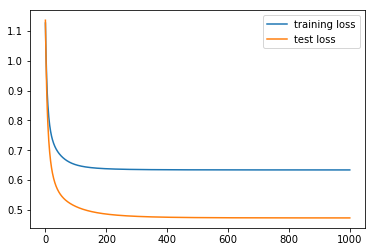

In [14]:
import matplotlib.pyplot as plt
import numpy as np

plt.plot(train_loss_array)
plt.plot(test_loss_array)

plt.legend(['training loss', 'test loss'], loc='upper right')

plt.show()

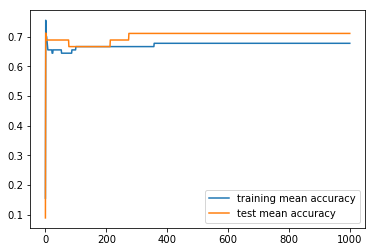

In [15]:
plt.plot(train_accuracy_arr)
plt.plot(test_accuracy_arr)
plt.legend(['training mean accuracy', 'test mean accuracy'], loc='lower right')
plt.show()

## 2.2: Decision Boundaries

In [27]:
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import sklearn.datasets
import sklearn.linear_model
import matplotlib

In [37]:
np.random.seed(0)

X, y = train_x, train_y
plt.scatter(X[:,0], X[:,1], s=40, c=y, cmap=plt.cm.Spectral)
# clf = sklearn.linear_model.LogisticRegressionCV()
# clf.fit(X, y)

def plot_decision_boundary(pred_func):

    # Set min and max values and give it some padding
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.01

    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Predict the function value for the whole gid
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)
    plt.show()
    
plot_decision_boundary(lambda x: my_predict())

# # clf.predict(X)

def my_predict(X):
    return train_preds

# my_predict()

ValueError: total size of new array must be unchanged

## Problem 3:  

In [83]:
def loadCIFAR10():
    def unpickle(file):
        import cPickle
        with open(file, 'rb') as fo:
            dict = cPickle.load(fo)
        return dict
    
    train_batch_1 = unpickle("./CIFAR_DATA/data_batch_1")
    train_batch_2 = unpickle("./CIFAR_DATA/data_batch_2")
    train_batch_3 = unpickle("./CIFAR_DATA/data_batch_3")
    train_batch_4 = unpickle("./CIFAR_DATA/data_batch_4")
    train_batch_5 = unpickle("./CIFAR_DATA/data_batch_5")
    
    trainFeat = np.concatenate((train_batch_1['data'], train_batch_2['data'], train_batch_3['data'], train_batch_4['data'], train_batch_5['data']))
    trainLabels = np.concatenate((train_batch_1['labels'], train_batch_2['labels'], train_batch_3['labels'], train_batch_4['labels'], train_batch_5['labels']))
    
    test_batch = unpickle("./CIFAR_DATA/test_batch")
    
    testFeat = test_batch['data']
    testLabels = test_batch['labels']
    
    return trainLabels, trainFeat, testLabels, testFeat
    
    
trainLabels, trainFeat, testLabels, testFeat = loadCIFAR10()

0
1
2
3
4
5
6
7
8
9


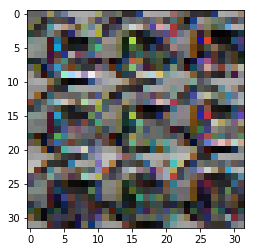

In [85]:
def print_first_three():
    
#     def plot_image(img):
#         blah = trainFeat[0].reshape(32,32,3)
#         plt.imshow(blah)
    
    counter = 0
    for label in range(0,10):
        print label
        for idx, train_label in enumerate(trainLabels):
            if counter == 3:
                counter = 0
                break
            if(train_label == label):
                plt.imshow(trainFeat[idx].reshape(32,32,3))
                counter += 1



print_first_three()

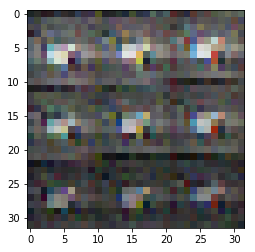

In [92]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

plt.imshow(trainFeat[3].reshape(32,32,3))

In [80]:
imgplot.show()

AttributeError: 'AxesImage' object has no attribute 'show'

SAMPLE EXPERIMENT

In [16]:
w = np.array([1,3,2,2,4,5])

In [17]:
np.exp([17])

array([ 24154952.7535753])

In [18]:
np.exp(17)/(np.exp(17)+np.exp(39)+np.exp(40))

7.5020351370613768e-11

In [19]:
np.exp(39)/(np.exp(17)+np.exp(39)+np.exp(40))

0.26894142134981902

In [20]:
np.exp(40)/(np.exp(17)+np.exp(39)+np.exp(40))

0.73105857857516066

In [21]:
np.exp([17,39,40])/(np.exp(17) + np.exp(39)+np.exp(40))

array([  7.50203514e-11,   2.68941421e-01,   7.31058579e-01])

LOSS CALCULATION:

In [22]:
softmax_output_dummy = np.array([[.5, .4, .1], [.2, .1, .7]])
one_hot_label_dummy = np.array([[0,1,0], [0,0,1]])


In [23]:
oh_rs = one_hot_label_dummy.reshape(1, one_hot_label_dummy.shape[0] * one_hot_label_dummy.shape[1])
sm_rs = softmax_output_dummy.reshape(softmax_output_dummy.shape[0]*softmax_output_dummy.shape[1],1)
loggify_sm = np.log(sm_rs)
loss = -1 * np.dot(oh_rs, loggify_sm)[0][0]

In [24]:
sm_rs = softmax_output_dummy.reshape(softmax_output_dummy.shape[0]*softmax_output_dummy.shape[1],1)
sm_rs

array([[ 0.5],
       [ 0.4],
       [ 0.1],
       [ 0.2],
       [ 0.1],
       [ 0.7]])

In [25]:
loggify_sm = np.log(sm_rs)
loggify_sm

array([[-0.69314718],
       [-0.91629073],
       [-2.30258509],
       [-1.60943791],
       [-2.30258509],
       [-0.35667494]])

In [26]:
-1 * np.dot(oh_rs, loggify_sm)[0][0]

1.2729656758128876